[코로나(COVID)-19 현황 | 경기도 감염병관리지원단](http://www.gidcc.or.kr/%ec%bd%94%eb%a1%9c%eb%82%98covid-19-%ed%98%84%ed%99%a9/)

* http://www.gidcc.or.kr/%ec%bd%94%eb%a1%9c%eb%82%98covid-19-%ed%98%84%ed%99%a9/

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(font="AppleGothic", rc={"axes.unicode_minus": False})

In [2]:
df = pd.read_csv("data/gidcc_covid19.csv", encoding="utf-8")
df.shape

(5815, 16)

In [3]:
df.head()

,연번,확진자,성별,나이(만),연령대,확진일자,증상발현일,무증상/조사중,경기번호,지역,재검출,감염경로,GRP,구분,구분2,구분.1
0,1,3.0,M,54,50,2020. 1. 26.,2020. 1. 22.,NaN,고양-1,고양일산서,NaN,해외유입,grp01,Primary,NaN,Primary
1,2,4.0,M,55,50,2020. 1. 27.,2020. 1. 25.,NaN,평택-1,평택,NaN,해외유입,grp02,Primary,NaN,Primary
2,3,12.0,M,48,40,2020. 2. 1.,2020. 1. 20.,NaN,부천-1,부천,NaN,해외유입,grp03,Primary,NaN,Primary
3,4,14.0,F,40,40,2020. 2. 2.,2020. 1. 29.,NaN,부천-2,부천,NaN,해외유입,grp03,접촉자,NaN,접촉자
4,5,15.0,M,42,40,2020. 2. 2.,2020. 2. 1.,NaN,수원-1,수원장안,NaN,해외유입,grp04,Primary,NaN,Primary


In [4]:
pd.options.display.max_columns = 50

In [5]:
df.tail()

,연번,확진자,성별,나이(만),연령대,확진일자,증상발현일,무증상/조사중,경기번호,지역,재검출,감염경로,GRP,구분,구분2,구분.1
5810,5811,NaN,F,42,40,2020. 11. 11.,2020. 11. 10.,NaN,의정부-269,의정부,NaN,불명확,NaN,NaN,NaN,NaN
5811,5812,NaN,F,5,0,2020. 11. 11.,NaN,무증상,구리-81,구리,NaN,불명확,grp1751,접촉자,NaN,접촉자
5812,5813,NaN,F,26,20,2020. 11. 1.,NaN,무증상,성남-523,성남분당,NaN,불명확,grp1641,접촉자,NaN,접촉자
5813,5814,NaN,F,61,60,2020. 11. 11.,2020. 11. 10.,NaN,성남-524,성남분당,NaN,불명확,NaN,NaN,NaN,NaN
5814,5815,NaN,F,6,0,2020. 11. 11.,NaN,무증상,평택-438,평택송탄,NaN,해외유입,NaN,NaN,NaN,NaN


In [6]:
df.columns

Index(['연번', '확진자', '성별', '나이(만)', '연령대', '확진일자', '증상발현일', '무증상/조사중', '경기번호',
       '지역', '재검출', '감염경로', 'GRP', '구분', '구분2', '구분.1'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5815 entries, 0 to 5814
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   연번       5815 non-null   int64  
 1   확진자      5780 non-null   float64
 2   성별       5815 non-null   object 
 3   나이(만)    5815 non-null   int64  
 4   연령대      5815 non-null   int64  
 5   확진일자     5815 non-null   object 
 6   증상발현일    3725 non-null   object 
 7   무증상/조사중  2090 non-null   object 
 8   경기번호     5815 non-null   object 
 9   지역       5815 non-null   object 
 10  재검출      49 non-null     object 
 11  감염경로     5815 non-null   object 
 12  GRP      5798 non-null   object 
 13  구분       5798 non-null   object 
 14  구분2      1085 non-null   object 
 15  구분.1     5798 non-null   object 
dtypes: float64(1), int64(3), object(12)
memory usage: 727.0+ KB


In [8]:
df_nunique = df.nunique()
df_nunique

연번         5815
확진자        5780
성별            2
나이(만)       101
연령대          11
확진일자        269
증상발현일       268
무증상/조사중       2
경기번호       5815
지역           49
재검출          37
감염경로          7
GRP        1768
구분           18
구분2           7
구분.1         18
dtype: int64

In [9]:
object_data = df_nunique[(df_nunique < 25) & (df_nunique > 1)]
cols_object = object_data.index
cols_object

Index(['성별', '연령대', '무증상/조사중', '감염경로', '구분', '구분2', '구분.1'], dtype='object')

In [10]:
cols_len = len(cols_object)
cols_len

7

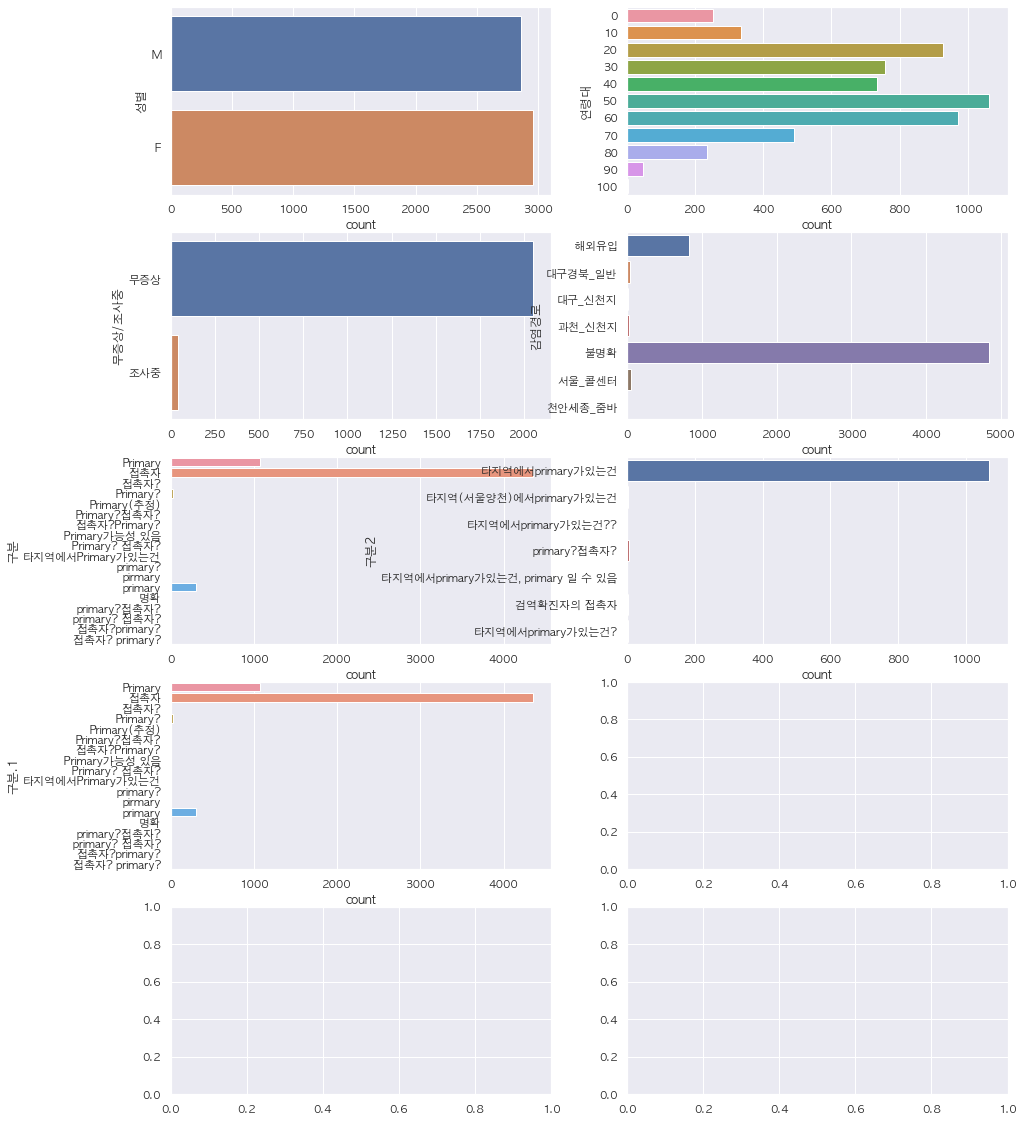

In [11]:
fig, axes = plt.subplots(5, 2, figsize=(15, 20))
for i, col_name in enumerate(cols_object):
    row = i // 2
    col = i % 2
    sns.countplot(data=df, y=col_name, ax=axes[row][col])

In [12]:
df["연도"] = df["확진일자"].str.split(".", expand=True)[0].str.strip()
df["월"] = df["확진일자"].str.split(".", expand=True)[1].str.strip()
df["일"] = df["확진일자"].str.split(".", expand=True)[2].str.strip()

In [14]:
df["지역"].value_counts()

부천       424
평택       366
의정부      269
광주       241
성남분당     240
고양덕양     234
용인기흥     212
군포       201
성남수정     186
남양주풍양    179
화성       169
김포       167
고양일산동    167
안양동안     158
시흥       158
파주       148
용인수지     147
광명       136
안양만안     135
포천       135
남양주      126
양평       108
수원영통     106
안산단원     103
고양일산서    100
성남중원      98
안산상록      95
양주        87
구리        81
수원장안      74
하남        71
오산        71
이천        70
수원권선      69
수원팔달      66
평택송탄      66
용인처인      62
가평        60
여주        51
동두천       48
안성        33
의왕        32
과천        27
연천        16
용인         9
평택안중       6
수원         4
안양         2
안산         2
Name: 지역, dtype: int64

In [15]:
city_count = df["지역"].value_counts()
city_count

부천       424
평택       366
의정부      269
광주       241
성남분당     240
고양덕양     234
용인기흥     212
군포       201
성남수정     186
남양주풍양    179
화성       169
김포       167
고양일산동    167
안양동안     158
시흥       158
파주       148
용인수지     147
광명       136
안양만안     135
포천       135
남양주      126
양평       108
수원영통     106
안산단원     103
고양일산서    100
성남중원      98
안산상록      95
양주        87
구리        81
수원장안      74
하남        71
오산        71
이천        70
수원권선      69
수원팔달      66
평택송탄      66
용인처인      62
가평        60
여주        51
동두천       48
안성        33
의왕        32
과천        27
연천        16
용인         9
평택안중       6
수원         4
안양         2
안산         2
Name: 지역, dtype: int64

In [16]:
df["성별"].value_counts()

F    2956
M    2859
Name: 성별, dtype: int64

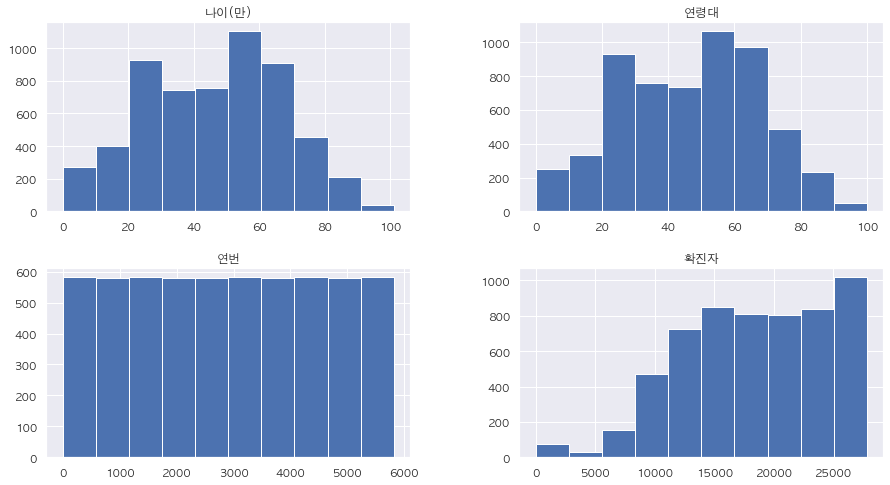

In [17]:
h = df.hist(figsize=(15, 8))

In [20]:
df["재검출"].nunique()

37

In [22]:
df["재검출"].unique()

array([nan, '2.28재검출', '3.27재검출', '4.3재검출', '4.14재검출', '3.28재검출',
       '4.13재검출', '4.29재검출', '4.12, 5.9재검출', '4.28재검출', '4.16재검출',
       '4.23재검출', '4.18재검출', '4.21재검출', '5.14재검출', '5.8재검출', '4.30재검출',
       '5.15재검출', '5.9재검출', '7.27재검출', '7.10재검출', '7.23재양성', '7.22재검출',
       '7.31재검출', '7.20재검출', '7.25재검출', '8.13재검출', '10.3 재검출', '10.1 재검출',
       '8.28재검출', '10.3재검출', '9.25 재검출', '9.9 재검출', '10.27 재검출',
       '10.11 재검출', '10.12재검출', '10.15 재검출', '11.9 재검출'], dtype=object)

In [23]:
df["감염경로"].value_counts()

불명확        4846
해외유입        830
서울_콜센터       54
대구경북_일반      44
과천_신천지       22
대구_신천지       15
천안세종_줌바       4
Name: 감염경로, dtype: int64

/Users/corazzon/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


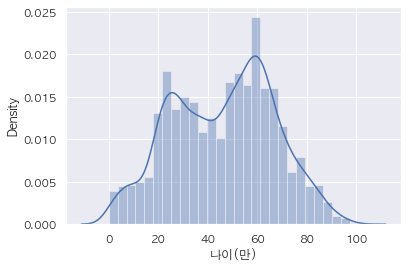

In [24]:
sns.distplot(df["나이(만)"])

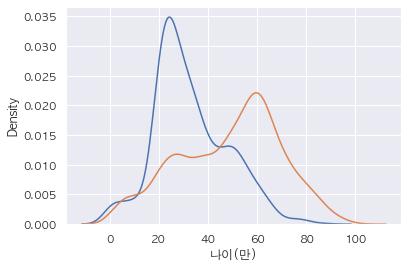

In [25]:
age = df.loc[df["감염경로"] != "불명확", "나이(만)"]
null_age = df.loc[df["감염경로"] == "불명확", "나이(만)"]
sns.kdeplot(age, label="감염경로 있음")
sns.kdeplot(null_age, label="불명확")

In [28]:
age_count = df["연령대"].value_counts().sort_index()
age_count

0       252
10      333
20      929
30      758
40      734
50     1064
60      972
70      489
80      234
90       48
100       2
Name: 연령대, dtype: int64

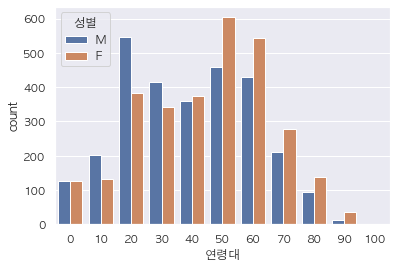

In [32]:
sns.countplot(data=df, x="연령대", hue="성별")

In [ ]:
import plotly.graph_objects as go

go.Figure(
    data=[go.Bar(x=age_count.index, y=age_count)],
    layout_title_text="연령대별 비율"
)

In [ ]:
go.Figure(
    data=[go.Bar(x=city_count.index, y=city_count)],
    layout_title_text="지역별 발생현황"
)

In [ ]:
month_count = df["월"].value_counts()
month_count = month_count.sort_index()

In [ ]:
go.Figure(
    data=[go.Bar(x=month_count.index, y=month_count)],
    layout_title_text="월별 발생현황"
)

In [ ]:
import plotly.express as px

px.line(x=month_count.index, y=month_count, labels={'x':'월', 'y':'확진 수'})